In [36]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import utilities as ut
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset_paths = ut.images_paths("Images/WarpedCards/")
base_cards_paths = ut.images_paths("Images/Cards/")
raw_cards_paths = ut.images_paths("Images/DatasetRaw/")

work_dir= ut.Config.working_directory




In [19]:
def append_data(row):
    data=row["moments"].copy()
    data = np.append(data,row["hue"])
    return data

In [20]:
#Generating dataset using the generated images from Dataset_Generator.ipynb 
labels = []
hu_moments = []
average_hue=[]
samples=[]
for path in dataset_paths:
    properties = ut.label_properties_generated(path)
    samples.append(properties)
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
    
df_generated = pd.DataFrame(samples)
df_generated["moments"] = hu_moments
df_generated["hue"] = average_hue
df_generated["data"] = df_generated.apply(append_data,axis=1)
print(df_generated)

     value seed label index  \
0        A    S    AS    18   
1        9    S    9S     7   
2        9    S    9S    23   
3        3    C     C     4   
4        R    B    RB    20   
...    ...  ...   ...   ...   
1339     6    B     B    22   
1340     8    B    8B    21   
1341     4    S    4S    18   
1342     7    C     C    15   
1343     A    C    AC    11   

                                                moments        hue  \
0     [0.2627428192644167, 0.021386079894190113, 0.0...  66.209841   
1     [0.23044322458768204, 0.016543263202695956, 0....  42.360473   
2     [0.2325673247302183, 0.017557550374688986, 0.0...  42.228149   
3     [0.20834714544398625, 0.011968949551396844, 0....  67.184214   
4     [0.2570496787810102, 0.030344385372871815, 0.0...  62.656645   
...                                                 ...        ...   
1339  [0.3130174385627956, 0.0695351102639355, 0.003...  61.375499   
1340  [0.3695347476746479, 0.07752231810106953, 0.00...  54.900580 

In [21]:
labels = []
hu_moments = []
samples=[]
average_hue=[]
for path in base_cards_paths:
    samples.append(ut.label_class_only(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_base = pd.DataFrame(samples)
df_base["moments"] = hu_moments
df_base["hue"] = average_hue
df_base["data"] = df_base.apply(append_data,axis=1)
print(df_base)


   value seed label                                            moments  \
0      7    C     C  [0.22225804081103337, 0.01594525095038476, 0.0...   
1      A    C    AC  [0.24305554848722474, 0.028763687428324046, 2....   
2      R    B     R  [0.26686700528342994, 0.03424285951895691, 0.0...   
3      7    S     7  [0.7296534270326875, 0.1525365272091704, 0.238...   
4      8    C     8  [0.40925092982787187, 0.10357475336507306, 0.0...   
5      4    O     4  [0.24825667613837687, 0.01543724752987511, 0.0...   
6      6    C     C  [0.248431159173635, 0.028764490485784156, 0.00...   
7      R    S     R  [0.26074346777962304, 0.030003292785587676, 0....   
8      4    C     C  [0.2142792002949413, 0.014672966581150875, 0.0...   
9      3    S    3S  [0.3549009320799103, 0.04035568095240079, 0.00...   
10     2    C    2C  [0.1870315616498156, 0.00036129249108887343, 0...   
11     5    S     5  [0.3911050708229767, 0.050549019411397944, 0.0...   
12     8    O     8  [0.44017008618482

In [22]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(df_generated["data"].tolist())
Scaled_data=scaling.transform(df_generated["data"].tolist())
x=Scaled_data
print(x.shape)

(1344, 8)


In [23]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x,df_generated["label"].tolist(), test_size=0.2, random_state=42)
f_clf = RandomForestClassifier(n_estimators=10)
f_clf = f_clf.fit(X_train,y_train)
predictions = f_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9888475836431226
Classification Report:
              precision    recall  f1-score   support

          2B       1.00      1.00      1.00         5
          2C       1.00      1.00      1.00         5
          2S       1.00      1.00      1.00         5
          3B       1.00      1.00      1.00         2
          3S       1.00      1.00      1.00        10
          4O       1.00      1.00      1.00        12
          4S       1.00      1.00      1.00        11
          5S       1.00      1.00      1.00        14
          7S       1.00      1.00      1.00         9
          8B       0.88      1.00      0.93         7
          8C       1.00      0.92      0.96        12
          8O       1.00      1.00      1.00         8
          8S       1.00      1.00      1.00         9
          9B       1.00      1.00      1.00         8
          9C       1.00      0.86      0.92         7
          9O       0.88      1.00      0.93         7
          9S       0.90      

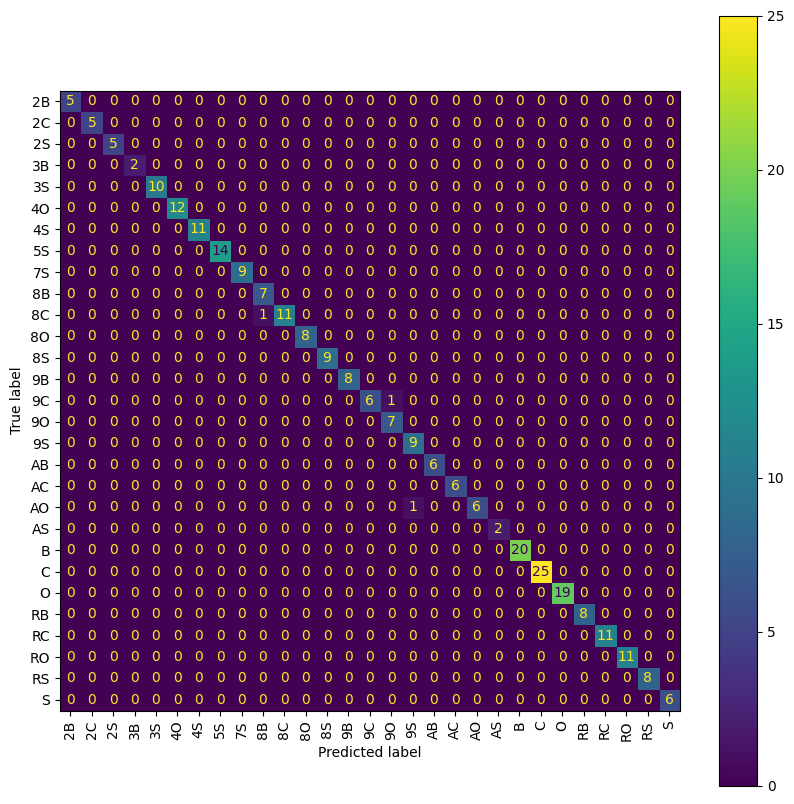

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=f_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=f_clf.classes_)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, xticks_rotation='vertical')


In [25]:
import joblib
joblib.dump(f_clf,ut.Config.working_directory+"forest_classifier.sav")
joblib.dump(scaling,ut.Config.working_directory+"scaler.sav")

['workingDirectory/scaler.sav']

In [26]:
test_image = cv2.imread('Images/DatasetCropped/7B-1.jpg')
#test_image = cv2.imread(work_dir+"opencv_frame_0.png")
image = cv2.imread(path)
binary_image,contours_test = ut.preprocess_image(test_image)
hue = ut.average_hue_of_contours(test_image, [contours_test[0]])
moments = cv2.moments(contours_test[0])
hu_moments_test= cv2.HuMoments(moments).flatten()
data = hu_moments_test.copy()
data = np.append(data,hue)
print(data)
data=scaling.transform(data.reshape(1, -1))
result=f_clf.predict(data)
print(result)

[ 3.77841009e-01  1.14804399e-01  4.99268412e-03  3.30446207e-03
  1.34211879e-05  1.11840577e-03 -1.50341450e-07  7.04692877e+01]
['B']


In [27]:
counter=0
#Counting smaller contours
if result in ['O','B','S','C']:
    counter=1
    for contour in contours_test[1:7]:
        print(counter)
        moments = cv2.moments(contour)
        hu_moments_test= cv2.HuMoments(moments).flatten()
        hue = ut.average_hue_of_contours(test_image, [contour])
        data = hu_moments_test.copy()
        data = np.append(data,hue)
        data=scaling.transform(data.reshape(1, -1))
        if f_clf.predict(data)== result:
            counter+=1
        else: break    
if(counter==0):
    counter=''

print("{}{}".format(result,counter))

1
2
3
4
5
6
['B']7
